#####  ` Import Libraries `

In [52]:
# Data Handling
import numpy as np
import pandas as pd
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox

# Feature Selection
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Model Selection and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Utilities
import joblib

##### `Read the Date`

In [53]:
df = pd.read_csv(os.path.join(os.getcwd(),"../../Datasets/Churn_Modelling.csv"))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [56]:
df.describe(include=['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [57]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [58]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7917,7918,15590094,Nwachukwu,613,Germany,Male,38,9,126265.88,2,0,0,15859.95,0


In [59]:
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)

In [60]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1507,549,Germany,Female,43,3,134985.66,1,1,0,6101.41,0


##### `EDA`

In [61]:
# check null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [62]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

In [63]:
# Geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [64]:
# Gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [65]:
# Target
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [66]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include='O').columns

* ` Box Plots for Outliers & Spread`

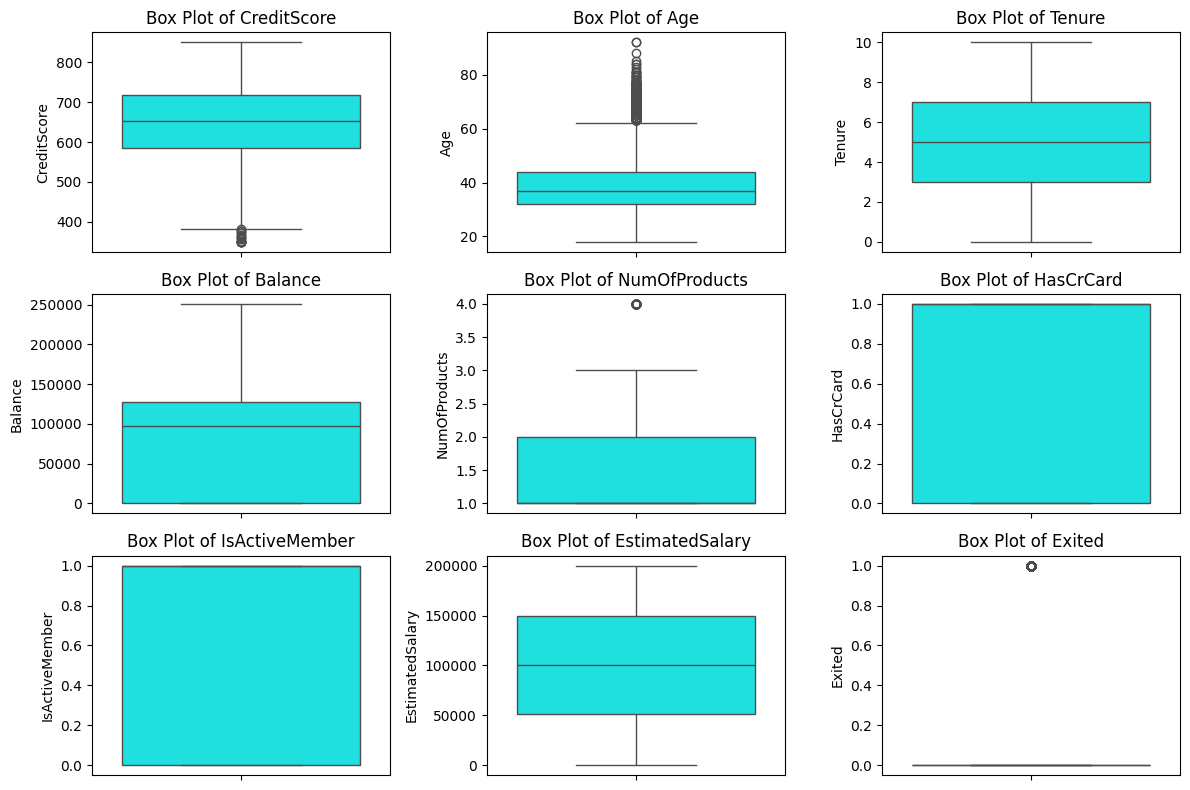

In [67]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='cyan')
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()


In [68]:
# Define the columns for outlier detection
outlier_columns = ['Age', 'NumOfProducts', 'CreditScore']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Print the number of outliers detected
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Number of outliers detected in {col}: {len(outliers)}")

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function
df = remove_outliers_iqr(df, outlier_columns)

# Check the new dataset size
print(f"New dataset size after outlier removal: {df.shape}")


Number of outliers detected in Age: 359
Number of outliers detected in NumOfProducts: 59
Number of outliers detected in CreditScore: 13
New dataset size after outlier removal: (9569, 11)


*  `Histogram for Numerical Features`

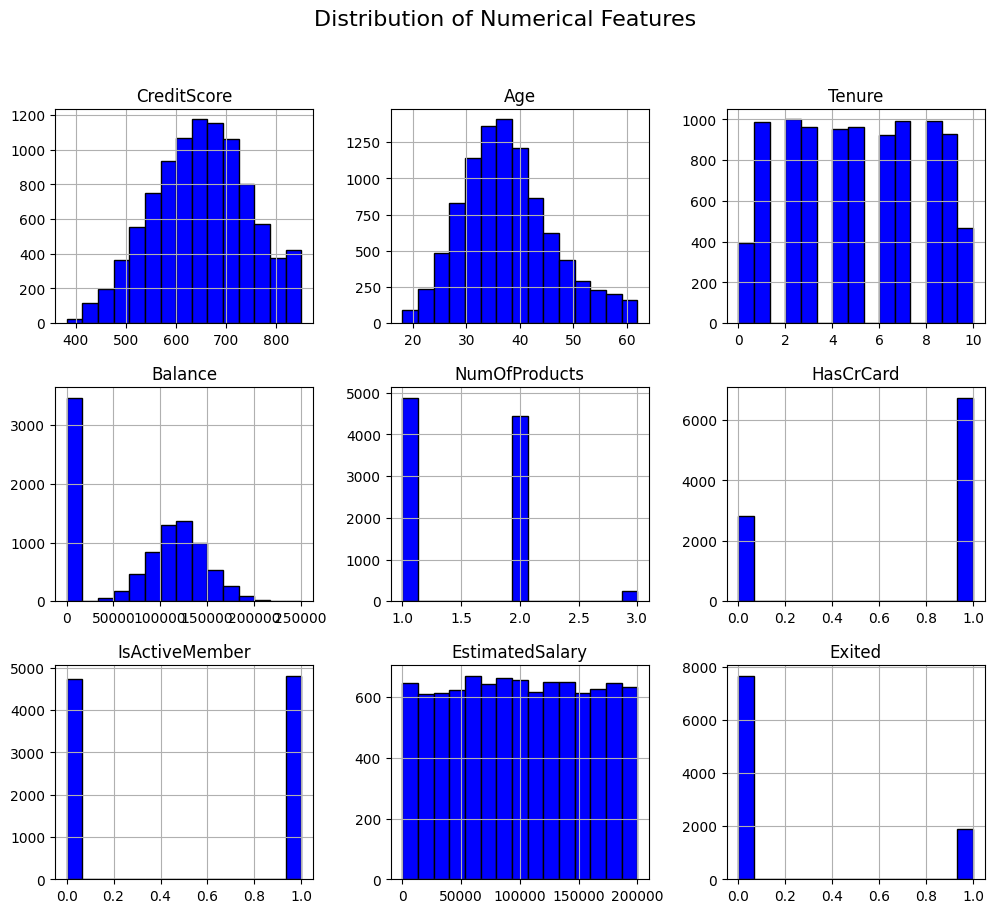

In [69]:
# Plot histograms for all numerical features
df[numerical_features].hist(figsize=(12, 10), bins=15, color='blue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


* ` Count Plot for Categorical Features`

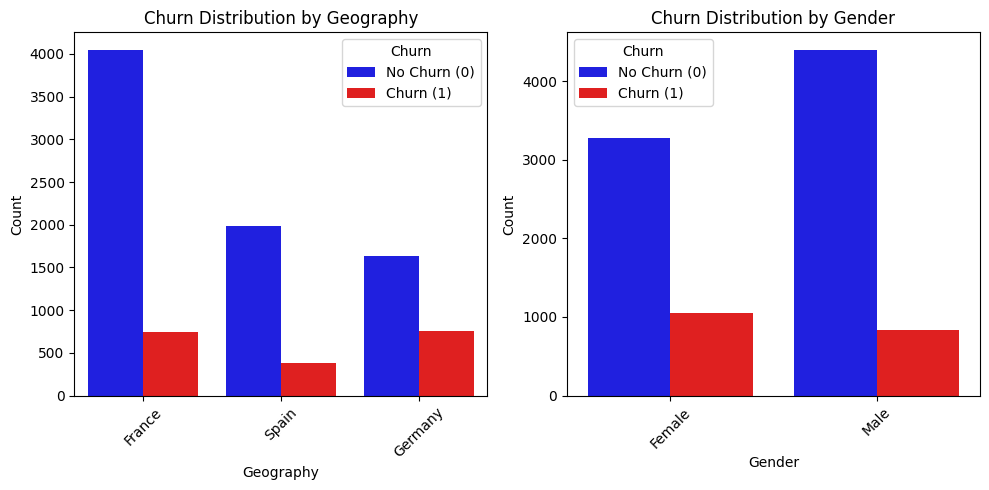

In [70]:
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(5 * len(categorical_features), 5))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(data=df, x=col, hue="Exited", palette=["blue", "red"])
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Churn", labels=["No Churn (0)", "Churn (1)"])

plt.tight_layout()
plt.show()

* `Bivariate Visualization`

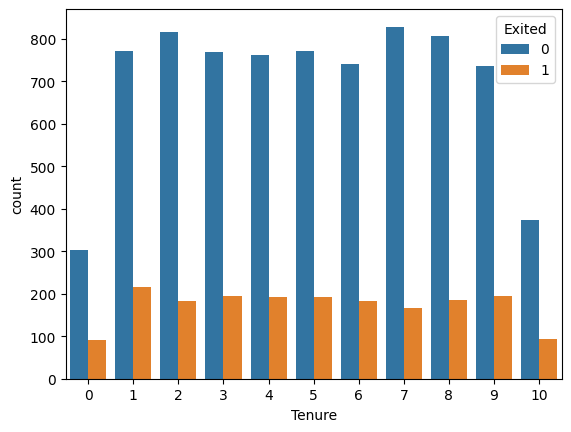

In [71]:
# Realation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')  ## labels, title
plt.show()

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

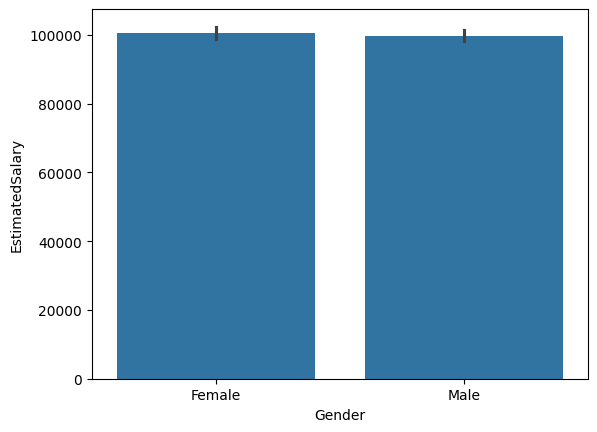

In [72]:
sns.barplot(data=df, x="Gender", y="EstimatedSalary", estimator="mean")

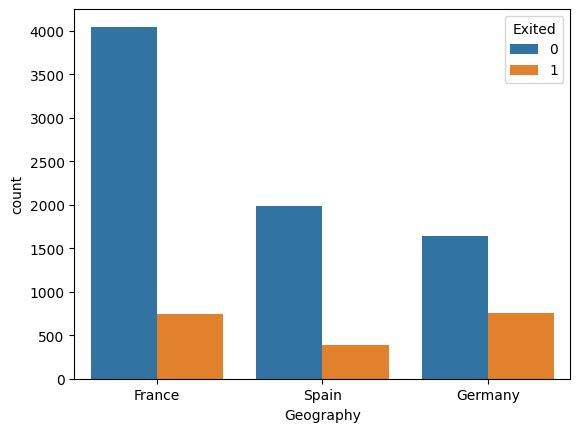

In [73]:
# Geography with Exited
sns.countplot(data=df,x='Geography', hue='Exited') 
plt.show()

##### `Data Splitting`

In [74]:
X= df.drop(columns=['Exited'])
y= df['Exited']

# Split the data into 70% Train and 30% Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y , random_state=31)

print(f"Train Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Train Set: (6698, 10), (6698,)
Test Set: (2871, 10), (2871,)


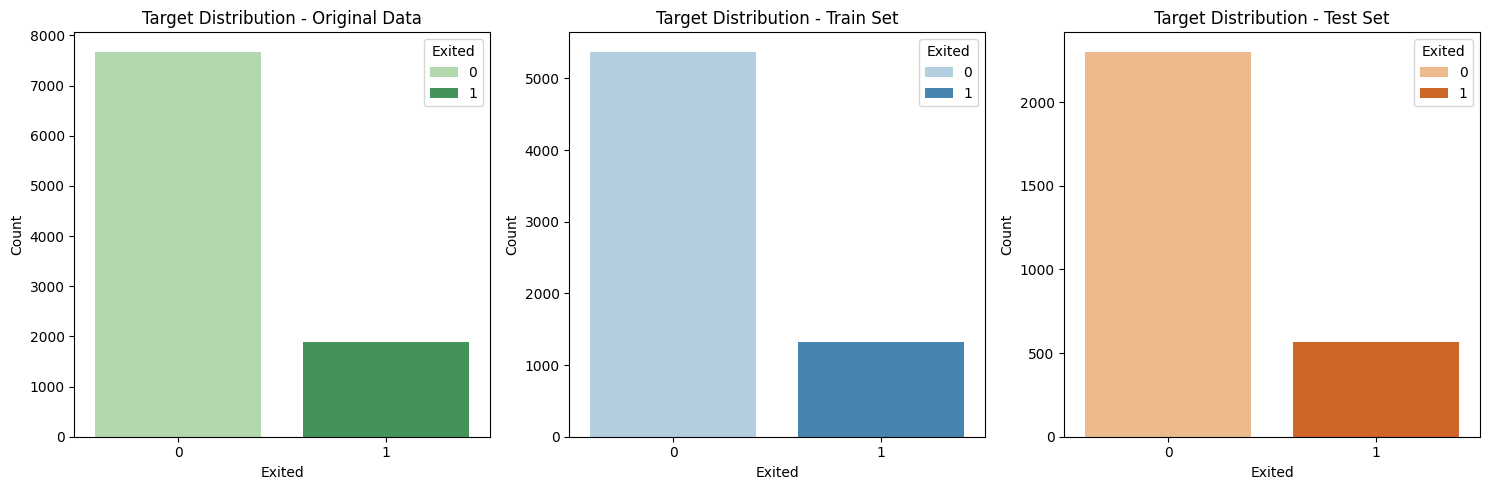

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
sns.countplot(x=y, ax=axes[0], hue = y ,palette="Greens")
axes[0].set_title("Target Distribution - Original Data")
axes[0].set_ylabel("Count")

# Train Set
sns.countplot(x=y_train, ax=axes[1], hue = y_train ,palette="Blues")
axes[1].set_title("Target Distribution - Train Set")
axes[1].set_ylabel("Count")

# Test Set
sns.countplot(x=y_test, ax=axes[2], hue = y_test ,palette="Oranges")
axes[2].set_title("Target Distribution - Test Set")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

##### `Feature Selection`

In [76]:
# Separating column types
numerical_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
categorical_features = ['Geography', 'Gender']
ready_features = list(set(X_train.columns)-set(numerical_features)-set(categorical_features))


In [77]:
# Numerical cols (num_cols) with Target col --> ANOVA
_, p_val = f_classif(X=X_train[numerical_features], y=y_train)
p_val    # p_value ~ 0.05 --> Reject H0 --> There is an association between features and target

array([1.97641815e-002, 8.36240537e-189, 4.78855512e-021, 4.54807936e-001])

In [78]:
# Categorical cols (categ_cols) with Target col --> chi2
_, p_val = chi2(X=OrdinalEncoder().fit_transform(X_train[categorical_features]), y=y_train)
p_val < 0.05  # p_value ~ 0.05 --> Reject H0 --> There is an association between features and target

array([ True,  True])

In [79]:
# Ready cols (ready_cols) with Target col --> chi2
_, p_val = chi2(X=X_train[ready_features], y=y_train)
p_val   # p_value ~ 0.05 --> Reject H0 --> There is an association between features and target

array([2.47397649e-05, 6.83601800e-01, 5.96184468e-01, 2.68182732e-16])

In [80]:
ready_features

['NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember']

In [81]:
# Drop irrelevant features from training and test sets
X_train = X_train.drop(columns=["EstimatedSalary", "Tenure", "HasCrCard"])
X_test = X_test.drop(columns=["EstimatedSalary", "Tenure", "HasCrCard"])

In [82]:
# Update numerical features (remove 'EstimatedSalary')
numerical_features = ["CreditScore", "Age", "Balance"]
ready_features = ['IsActiveMember', 'NumOfProducts']


##### `Preprocessing`

* `Pipeline`

In [83]:
# Before the pipeline
(X_train.shape, y_train.shape)

((6698, 7), (6698,))

In [84]:
#  Pipeline for Numeric Features (Imputation → Transformation → Scaling)
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler())  # Normalize
])

#  Pipeline for Categorical Features (Imputation → Encoding)
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values
    ("encoder", OneHotEncoder(sparse_output=False , drop="first" , handle_unknown='ignore'))  # Convert categories to numeric
])

ready_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values
])


# Combine All Pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features),
    ("ready", ready_pipeline, ready_features)
])

In [85]:
# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [86]:
# After the pipleline
(X_train_preprocessed.shape, X_test_preprocessed.shape)

((6698, 8), (2871, 8))

* `Dump the preprocessor`

In [87]:
Arftifacts_Folder_Path = os.path.join(os.getcwd(),'Artifacts')
os.makedirs(Arftifacts_Folder_Path , exist_ok=True)
joblib.dump(preprocessor, os.path.join(Arftifacts_Folder_Path,"preprocessor.pkl"))

['c:\\Users\\AsmaA\\Desktop\\DEPI\\Notebooks\\Notebooks\\Churn Modelling\\Artifacts\\preprocessor.pkl']

##### `Classification Models`

* `Dealing with imbalanced data`

In [88]:
# 1. Using class_weights for solving imbalanced dataset
val_count = 1 - (np.bincount(y_train) / len(y_train))
val_count = val_count / sum(val_count)
dict_weights = {}
for i in range(2):  # 2 classes (0, 1)
    dict_weights[i] = val_count[i]

# to model
dict_weights

{0: np.float64(0.19767094655120931), 1: np.float64(0.8023290534487907)}

In [89]:
# 2. Using UnderSampling or OverSampling

# Oversampling
over = SMOTE(sampling_strategy=0.7, k_neighbors=5, random_state=45)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_preprocessed, y_train)

* `Logistic Regression`

In [90]:
# Train Logistic Regression
log_reg = LogisticRegression(C=1.5)
log_reg.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_train_log = log_reg.predict(X_train_preprocessed)
y_pred_test_log = log_reg.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for Logistic Regression (Base Model):", {"C": 1.5})
print("\n📊 F1-Score for training :", f1_score(y_train, y_pred_train_log, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_test_log, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_log))



🔹 Best Parameters for Logistic Regression (Base Model): {'C': 1.5}

📊 F1-Score for training : 0.8025298475475343

    F1-Score for testing : 0.8059342507510169

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2303
           1       0.67      0.30      0.42       568

    accuracy                           0.83      2871
   macro avg       0.76      0.63      0.66      2871
weighted avg       0.81      0.83      0.81      2871



In [91]:
# 2. Using logisit -- using class_weight
log_clf = LogisticRegression(C=1.5, class_weight=dict_weights)
log_clf.fit(X_train_preprocessed, y_train)

# Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_preprocessed)
y_pred_test_log = log_clf.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for Logistic Regression (Class Weight):", {"C": 1.5, "class_weight": dict_weights})
print("\n📊 F1-Score for training :", f1_score(y_train, y_pred_train_log, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_test_log, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_log))


🔹 Best Parameters for Logistic Regression (Class Weight): {'C': 1.5, 'class_weight': {0: np.float64(0.19767094655120931), 1: np.float64(0.8023290534487907)}}

📊 F1-Score for training : 0.7501714498326744

    F1-Score for testing : 0.7563488895181469

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      2303
           1       0.40      0.71      0.51       568

    accuracy                           0.73      2871
   macro avg       0.66      0.73      0.67      2871
weighted avg       0.81      0.73      0.76      2871



In [92]:
# 3. Using logisit -- using smote
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_preprocessed)
y_pred_test_log = log_clf.predict(X_test_preprocessed)

# using f1-score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log  = f1_score(y_test, y_pred_test_log)

# Evaluation metrics
print("\n🔹 Best Parameters for Logistic Regression (SMOTE):", {"C": 1.5})
print("\n📊 F1-Score for training :", f1_score(y_train, y_pred_train_log, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_test_log, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_log))


🔹 Best Parameters for Logistic Regression (SMOTE): {'C': 1.5}

📊 F1-Score for training : 0.7932956395217018

    F1-Score for testing : 0.7943337874505492

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      2303
           1       0.47      0.61      0.53       568

    accuracy                           0.78      2871
   macro avg       0.68      0.72      0.69      2871
weighted avg       0.81      0.78      0.79      2871



* `Random Forest`

In [93]:
# RF with class_weight
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)
forest_clf.fit(X_train_preprocessed, y_train)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_preprocessed)
y_pred_test_forest = forest_clf.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for Random Forest (Class Weight):", {"n_estimators": 150, "max_depth": 5, "class_weight": dict_weights})
print("\n📊 F1-Score for training :", f1_score(y_train, y_pred_train_forest, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_test_forest, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_forest))



🔹 Best Parameters for Random Forest (Class Weight): {'n_estimators': 150, 'max_depth': 5, 'class_weight': {0: np.float64(0.19767094655120931), 1: np.float64(0.8023290534487907)}}

📊 F1-Score for training : 0.8188433861074211

    F1-Score for testing : 0.819688636883228

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87      2303
           1       0.51      0.74      0.60       568

    accuracy                           0.81      2871
   macro avg       0.72      0.78      0.74      2871
weighted avg       0.84      0.81      0.82      2871



In [94]:
forest_base_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)

# Your space to search
params_best_grid = {
    'n_estimators': np.arange(50, 400, 50),
    'max_depth': np.arange(6, 10, 2)
}

grid_search_forest = GridSearchCV(estimator=forest_base_clf, param_grid=params_best_grid, cv=5, n_jobs=-1, verbose=4, scoring="f1")
grid_search_forest.fit(X_train_preprocessed, y_train)

(grid_search_forest.best_params_ , grid_search_forest.best_score_)



Fitting 5 folds for each of 14 candidates, totalling 70 fits


({'max_depth': np.int64(8), 'n_estimators': np.int64(150)},
 np.float64(0.6027104694465233))

In [95]:
# The forest after tuning
forest_tuned = grid_search_forest.best_estimator_

# Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_preprocessed)
y_pred_test_forest_tuned = forest_tuned.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for Random Forest (Grid Search):", grid_search_forest.best_params_)
print("\n📊 F1-Score for training :", f1_score(y_train, y_pred_train_forest_tuned, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_test_forest_tuned, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_forest_tuned))


🔹 Best Parameters for Random Forest (Grid Search): {'max_depth': np.int64(8), 'n_estimators': np.int64(150)}

📊 F1-Score for training : 0.8691249235037741

    F1-Score for testing : 0.8360369699150108

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      2303
           1       0.56      0.68      0.61       568

    accuracy                           0.83      2871
   macro avg       0.74      0.77      0.75      2871
weighted avg       0.85      0.83      0.84      2871



In [96]:
# RF with SMOTE
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forest_clf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_preprocessed)
y_pred_test_foerst = forest_clf.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for Random Forest (SMOTE):", {"n_estimators": 150, "max_depth": 5})
print("\n📊 F1-Score for training :", f1_score(y_train, y_pred_train_forest, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_test_forest, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_forest))


🔹 Best Parameters for Random Forest (SMOTE): {'n_estimators': 150, 'max_depth': 5}

📊 F1-Score for training : 0.8490842230963697

    F1-Score for testing : 0.819688636883228

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87      2303
           1       0.51      0.74      0.60       568

    accuracy                           0.81      2871
   macro avg       0.72      0.78      0.74      2871
weighted avg       0.84      0.81      0.82      2871



In [97]:
# Feature Importance from RF
features_after = [name.split('__')[1] for name in preprocessor.get_feature_names_out()]
forest_tuned_importance = pd.DataFrame({'feature': features_after, 
                            'importance': forest_tuned.feature_importances_}).sort_values('importance', ascending=False)
forest_tuned_importance

,feature,importance
1,Age,0.368152
7,NumOfProducts,0.240383
2,Balance,0.147094
0,CreditScore,0.089646
3,Geography_Germany,0.061172
6,IsActiveMember,0.053892
5,Gender_Male,0.028712
4,Geography_Spain,0.010947


* `XG Boost`

* `Class Weight`

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report

# Define model with scale_pos_weight to handle class imbalance
xgb_weighted = XGBClassifier(
    random_state=31,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],  # Handle imbalance
    objective="binary:logistic",
    max_depth=5,
    reg_lambda=5,
    learning_rate=0.1,
    n_estimators=150
)

# Define hyperparameter grid for RandomizedSearchCV
param_dist_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],  # Added subsample for regularization
    "colsample_bytree": [0.6, 0.8, 1.0],  # Feature selection per tree
    "gamma": [0, 0.1, 0.2, 0.3]  # Minimum loss reduction to split
}

# Perform RandomizedSearchCV
random_xgb_weighted = RandomizedSearchCV(
    xgb_weighted,
    param_distributions=param_dist_xgb,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    n_iter=20,  # Number of random samples to test
    random_state=31
)
random_xgb_weighted.fit(X_train_preprocessed, y_train)

# Best model from RandomizedSearchCV
best_xgb_weighted = random_xgb_weighted.best_estimator_

# Predictions on the test set
y_pred_xgb_weighted = best_xgb_weighted.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for Class-Weighted XGBoost:", random_xgb_weighted.best_params_)
print("\n📊 F1-Score for training :", f1_score(y_train, best_xgb_weighted.predict(X_train_preprocessed), average="macro"))
print("\n    F1-Score for testing :", f1_score(y_test, y_pred_xgb_weighted, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_weighted))



🔹 Best Parameters for Class-Weighted XGBoost: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}

📊 F1-Score for training : 0.8347053319243174

    F1-Score for testing : 0.7330987677531193

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      2303
           1       0.52      0.67      0.59       568

    accuracy                           0.81      2871
   macro avg       0.72      0.76      0.73      2871
weighted avg       0.84      0.81      0.82      2871



* `SMOTE Oversampled`

In [99]:
xgb_smote = XGBClassifier(
    random_state=31,
    objective="binary:logistic",
    max_depth=5,
    reg_lambda=5,
    learning_rate=0.1,
    n_estimators=150
)

# Define hyperparameter grid for RandomizedSearchCV
param_dist_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],  # Regularization
    "colsample_bytree": [0.6, 0.8, 1.0],  # Feature selection per tree
    "gamma": [0, 0.1, 0.2, 0.3]  # Minimum loss reduction for splits
}

# Perform RandomizedSearchCV
random_xgb_smote = RandomizedSearchCV(
    xgb_smote,
    param_distributions=param_dist_xgb,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    n_iter=20,  # Number of sampled hyperparameter combinations
    random_state=31
)
random_xgb_smote.fit(X_train_resampled, y_train_resampled)

# Best model from RandomizedSearchCV
best_xgb_smote = random_xgb_smote.best_estimator_

# Predictions on the training set
y_train_pred_xgb_smote = best_xgb_smote.predict(X_train_resampled)

# Predictions on the test set
y_test_pred_xgb_smote = best_xgb_smote.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for SMOTE XGBoost:", random_xgb_smote.best_params_)
print("\n📊 F1-Score for training :", f1_score(y_train_resampled, y_train_pred_xgb_smote, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test, y_test_pred_xgb_smote, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_xgb_smote))



🔹 Best Parameters for SMOTE XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}

📊 F1-Score for training : 0.96929170229158

    F1-Score for testing : 0.8372959514721967

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2303
           1       0.61      0.55      0.58       568

    accuracy                           0.84      2871
   macro avg       0.75      0.73      0.74      2871
weighted avg       0.83      0.84      0.84      2871



* `Decision Tree`

In [100]:
dtree = DecisionTreeClassifier()
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_resampled,y_train_resampled)

c:\Users\AsmaA\.conda\envs\depi\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
17920 fits failed out of a total of 35840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13876 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AsmaA\.conda\envs\depi\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AsmaA\.conda\envs\depi\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\AsmaA\.conda\envs\depi\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Use

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [101]:
best_parameters = grid_search.best_params_

dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(X_train_resampled,y_train_resampled)
y_train_pred = dtree.predict(X_train_resampled)
y_test_pred = dtree.predict(X_test_preprocessed)

# Evaluation metrics
print("\n🔹 Best Parameters for SMOTE Decision Tree:", grid_search.best_params_)
print("\n📊 F1-Score for training :", f1_score(y_train_resampled, y_train_pred, average="weighted"))
print("\n    F1-Score for testing :", f1_score(y_test,y_test_pred,average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


🔹 Best Parameters for SMOTE Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}

📊 F1-Score for training : 0.856706284619022

    F1-Score for testing : 0.8111798980914449

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      2303
           1       0.51      0.58      0.54       568

    accuracy                           0.81      2871
   macro avg       0.70      0.72      0.71      2871
weighted avg       0.82      0.81      0.81      2871



* `Dump The best model`

In [102]:
joblib.dump(forest_tuned,os.path.join(Arftifacts_Folder_Path, "RF_model.pkl"))

['c:\\Users\\AsmaA\\Desktop\\DEPI\\Notebooks\\Notebooks\\Churn Modelling\\Artifacts\\RF_model.pkl']